<a href="https://colab.research.google.com/github/Bushra1423/MedDiagnose2/blob/main/Kidney_Stone_Vit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!mkdir -p ~/.kaggle
!cp /kaggle/kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json  # Set permissions to secure the file

In [2]:
!kaggle datasets download -d nazmul0087/ct-kidney-dataset-normal-cyst-tumor-and-stone -p /content/

Dataset URL: https://www.kaggle.com/datasets/nazmul0087/ct-kidney-dataset-normal-cyst-tumor-and-stone
License(s): copyright-authors


In [3]:
import zipfile
import os

zip_path = "/content/ct-kidney-dataset-normal-cyst-tumor-and-stone.zip"  # Update if needed
extract_path = "/content/dataset"

os.makedirs(extract_path, exist_ok=True)

with zipfile.ZipFile(zip_path, "r") as zip_ref:
    zip_ref.extractall(extract_path)

print("Dataset extracted successfully!")


Dataset extracted successfully!


In [4]:
ls /content/dataset/

CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/  kidneyData.csv


In [9]:
import os
import pandas as pd

# Update base path to the extracted dataset directory
base_path = "/content/dataset/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone"
categories = ["Cyst", "Normal", "Stone", "Tumor"]
image_paths = []
labels = []

# Loop through each category and collect image paths and labels
for category in categories:
    category_path = os.path.join(base_path, category)
    if not os.path.exists(category_path):
        print(f"Warning: {category_path} does not exist. Skipping...")
        continue
    for image_name in os.listdir(category_path):
        image_path = os.path.join(category_path, image_name)
        image_paths.append(image_path)
        labels.append(category)

# Create a DataFrame
df = pd.DataFrame({
    "image_path": image_paths,
    "label": labels
})


In [10]:
df.head()

,image_path,label
0,/content/dataset/CT-KIDNEY-DATASET-Normal-Cyst...,Cyst
1,/content/dataset/CT-KIDNEY-DATASET-Normal-Cyst...,Cyst
2,/content/dataset/CT-KIDNEY-DATASET-Normal-Cyst...,Cyst
3,/content/dataset/CT-KIDNEY-DATASET-Normal-Cyst...,Cyst
4,/content/dataset/CT-KIDNEY-DATASET-Normal-Cyst...,Cyst


In [11]:
df.tail()

,image_path,label
12441,/content/dataset/CT-KIDNEY-DATASET-Normal-Cyst...,Tumor
12442,/content/dataset/CT-KIDNEY-DATASET-Normal-Cyst...,Tumor
12443,/content/dataset/CT-KIDNEY-DATASET-Normal-Cyst...,Tumor
12444,/content/dataset/CT-KIDNEY-DATASET-Normal-Cyst...,Tumor
12445,/content/dataset/CT-KIDNEY-DATASET-Normal-Cyst...,Tumor


In [12]:
df.columns

Index(['image_path', 'label'], dtype='object')

In [13]:
df.shape

(12446, 2)

In [14]:
df.duplicated().sum()

np.int64(0)

In [15]:
df.isnull().sum()

,0
image_path,0
label,0


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12446 entries, 0 to 12445
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   image_path  12446 non-null  object
 1   label       12446 non-null  object
dtypes: object(2)
memory usage: 194.6+ KB


<ipython-input-17-db19897d9a9b>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x=label_column, palette=palette)


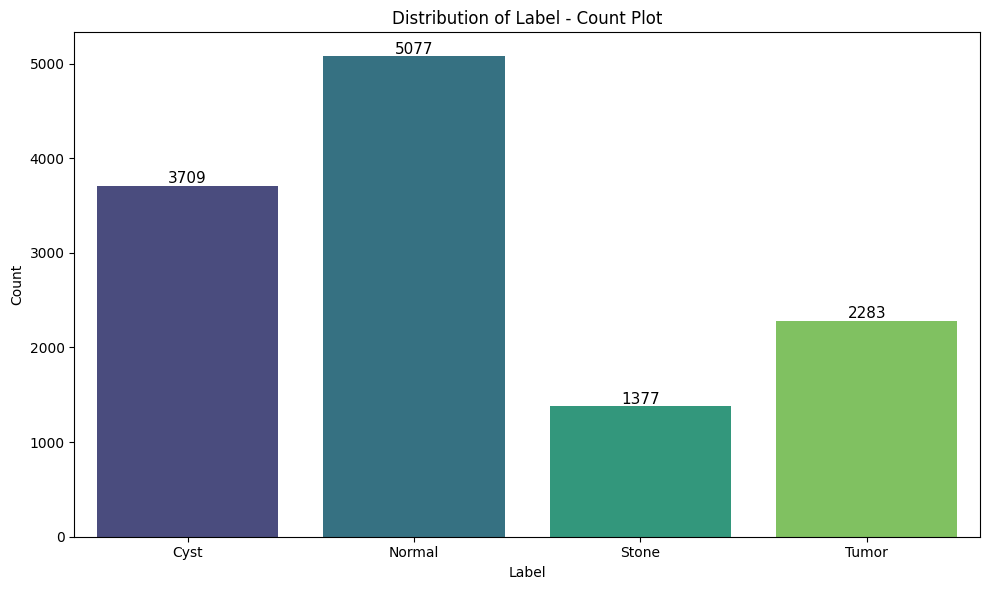

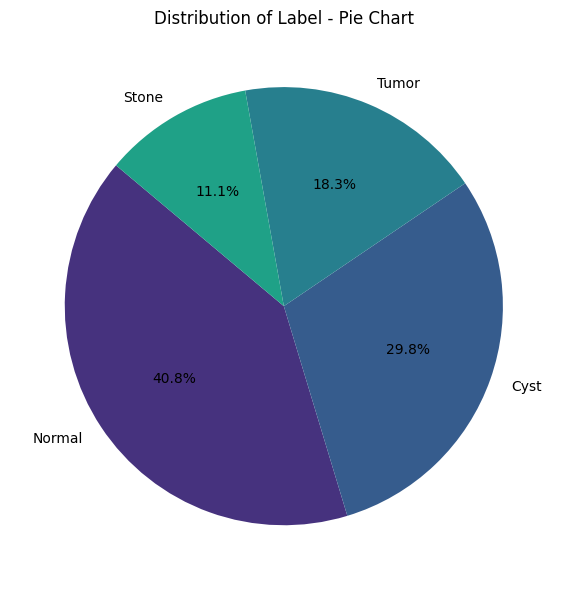

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

def visualize_label_distribution(df, label_column="label", figsize=(10, 6), palette="viridis"):
    """
    Visualizes the distribution of labels in a DataFrame using count and pie charts.

    Args:
        df (pd.DataFrame): The DataFrame containing the label data.
        label_column (str): The name of the column containing the labels. Defaults to "label".
        figsize (tuple): The figure size for the plots. Defaults to (10, 6).
        palette (str): The color palette to use. Defaults to "viridis".
    """

    plt.figure(figsize=figsize)
    ax = sns.countplot(data=df, x=label_column, palette=palette)
    plt.title(f"Distribution of {label_column.capitalize()} - Count Plot")
    plt.xlabel(label_column.capitalize())
    plt.ylabel("Count")

    for p in ax.patches:
        ax.annotate(f'{int(p.get_height())}',
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', fontsize=11, color='black', xytext=(0, 5),
                    textcoords='offset points')
    plt.tight_layout() # Prevents labels from being cut off
    plt.show()


    label_counts = df[label_column].value_counts()
    plt.figure(figsize=figsize)
    plt.pie(label_counts, labels=label_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette(palette))
    plt.title(f"Distribution of {label_column.capitalize()} - Pie Chart")
    plt.tight_layout()
    plt.show()

visualize_label_distribution(df)

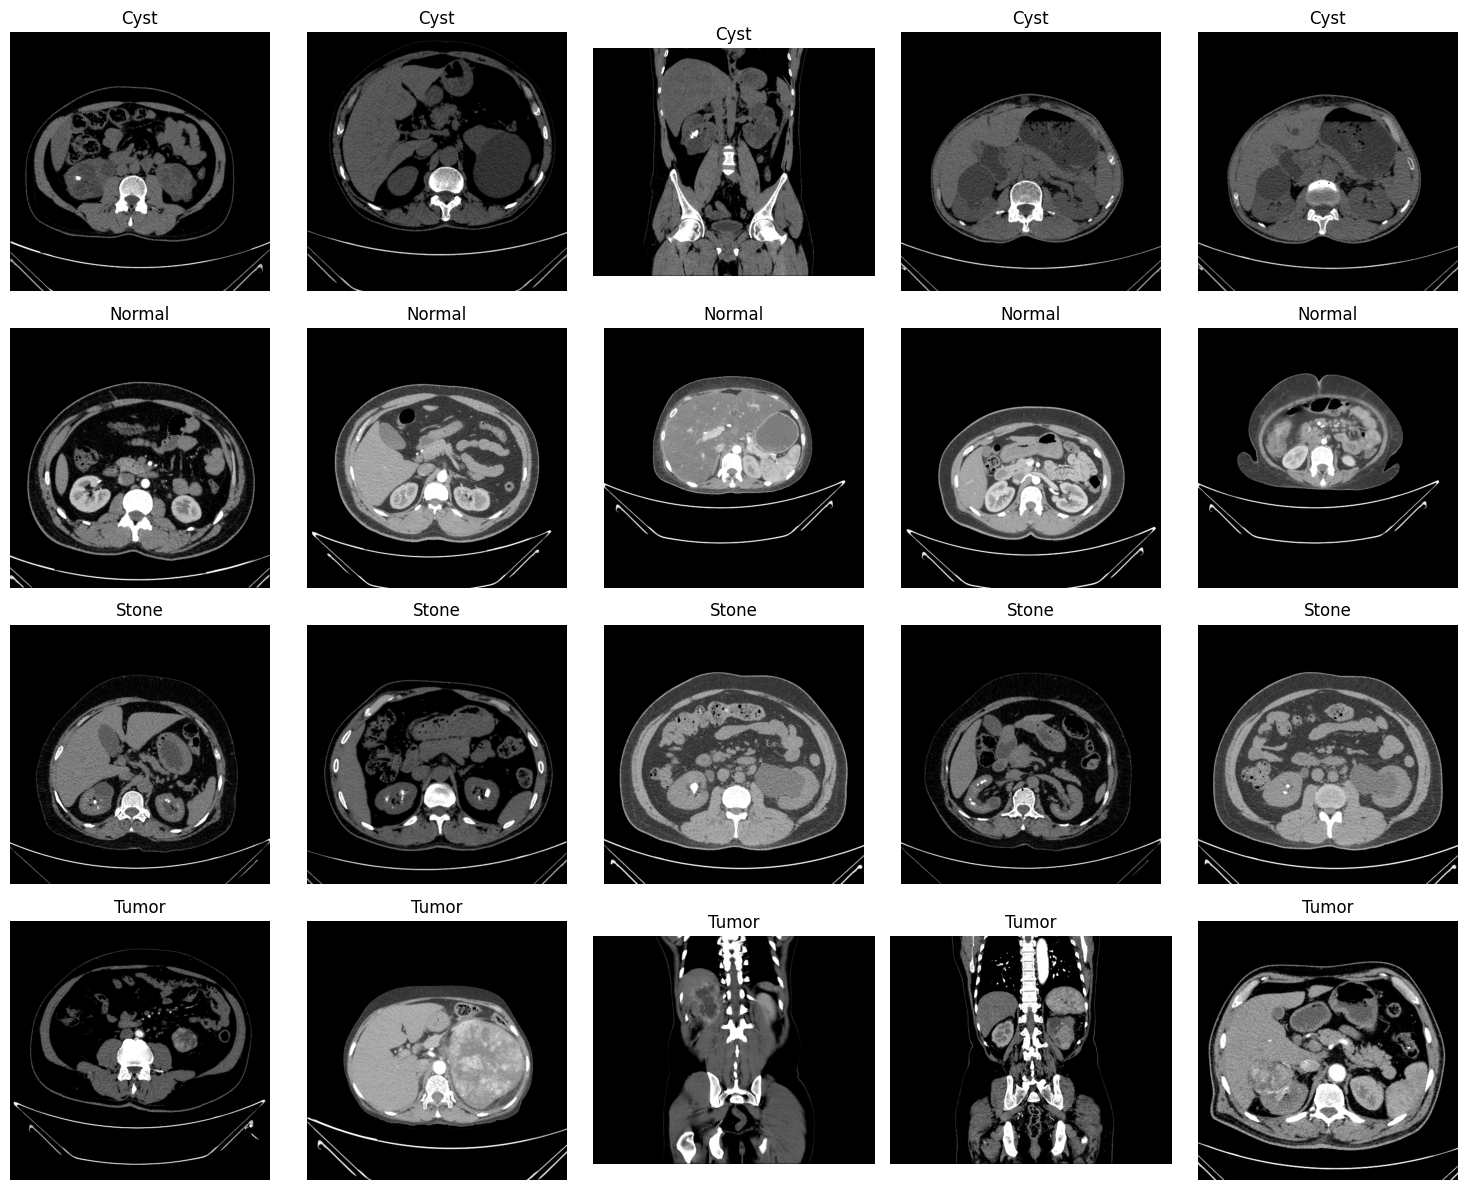

In [18]:
import cv2

num_images = 5

plt.figure(figsize=(15, 12))

for i, category in enumerate(categories):
    category_images = df[df['label'] == category]['image_path'].iloc[:num_images]

    for j, img_path in enumerate(category_images):

        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        plt.subplot(len(categories), num_images, i * num_images + j + 1)
        plt.imshow(img)
        plt.axis('off')
        plt.title(category)

plt.tight_layout()
plt.show()

In [19]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

df['category_encoded'] = label_encoder.fit_transform(df['label'])

In [20]:
df = df[['image_path', 'category_encoded']]

In [21]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(df[['image_path']], df['category_encoded'])

df_resampled = pd.DataFrame(X_resampled, columns=['image_path'])
df_resampled['category_encoded'] = y_resampled

In [22]:
print("\nClass distribution after oversampling:")
print(df_resampled['category_encoded'].value_counts())


Class distribution after oversampling:
category_encoded
0    5077
1    5077
2    5077
3    5077
Name: count, dtype: int64


In [23]:
df_resampled

,image_path,category_encoded
0,/content/dataset/CT-KIDNEY-DATASET-Normal-Cyst...,0
1,/content/dataset/CT-KIDNEY-DATASET-Normal-Cyst...,0
2,/content/dataset/CT-KIDNEY-DATASET-Normal-Cyst...,0
3,/content/dataset/CT-KIDNEY-DATASET-Normal-Cyst...,0
4,/content/dataset/CT-KIDNEY-DATASET-Normal-Cyst...,0
...,...,...
20303,/content/dataset/CT-KIDNEY-DATASET-Normal-Cyst...,3
20304,/content/dataset/CT-KIDNEY-DATASET-Normal-Cyst...,3
20305,/content/dataset/CT-KIDNEY-DATASET-Normal-Cyst...,3
20306,/content/dataset/CT-KIDNEY-DATASET-Normal-Cyst...,3


In [24]:
df_resampled['category_encoded'] = df_resampled['category_encoded'].astype(str)

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation, Dropout, BatchNormalization
from tensorflow.keras import regularizers

import warnings
warnings.filterwarnings("ignore")

print ('check')

check


In [26]:
train_df_new, temp_df_new = train_test_split(
    df_resampled,
    train_size=0.8,
    shuffle=True,
    random_state=42,
    stratify=df_resampled['category_encoded']
)

valid_df_new, test_df_new = train_test_split(
    temp_df_new,
    test_size=0.5,
    shuffle=True,
    random_state=42,
    stratify=temp_df_new['category_encoded']
)

In [27]:
batch_size = 16
img_size = (224, 224)
channels = 3
img_shape = (img_size[0], img_size[1], channels)

tr_gen = ImageDataGenerator(rescale=1./255)
ts_gen = ImageDataGenerator(rescale=1./255)

train_gen_new = tr_gen.flow_from_dataframe(
    train_df_new,
    x_col='image_path',
    y_col='category_encoded',
    target_size=img_size,
    class_mode='sparse',
    color_mode='rgb',
    shuffle=True,
    batch_size=batch_size
)

valid_gen_new = ts_gen.flow_from_dataframe(
    valid_df_new,
    x_col='image_path',
    y_col='category_encoded',
    target_size=img_size,
    class_mode='sparse',
    color_mode='rgb',
    shuffle=True,
    batch_size=batch_size
)

test_gen_new = ts_gen.flow_from_dataframe(
    test_df_new,
    x_col='image_path',
    y_col='category_encoded',
    target_size=img_size,
    class_mode='sparse',
    color_mode='rgb',
    shuffle=False,
    batch_size=batch_size
)

Found 16246 validated image filenames belonging to 4 classes.
Found 2031 validated image filenames belonging to 4 classes.
Found 2031 validated image filenames belonging to 4 classes.


In [28]:
import tensorflow as tf

print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


In [29]:
gpus = tf.config.list_physical_devices('GPU')
if gpus:
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        print("GPU is set for TensorFlow")
    except RuntimeError as e:
        print(e)

GPU is set for TensorFlow


In [30]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [31]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# MaxVit Transformer

In [32]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Model
from tensorflow.keras.regularizers import l2

batch_size = 16
img_size = (224, 224, 3)
patch_size = 16
embed_dim = 64
num_heads = 4
window_size = 7
num_blocks = 1
mlp_dim = 128
num_classes = 4
dropout_rate = 0.1
weight_decay = 1e-4

initial_learning_rate = 1e-4
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate, decay_steps=1000, decay_rate=0.9, staircase=True
)
optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)

class PatchEmbedding(layers.Layer):
    def __init__(self, patch_size, embed_dim):
        super(PatchEmbedding, self).__init__()
        self.patch_size = patch_size
        self.embed_dim = embed_dim
        self.proj = layers.Conv2D(embed_dim, patch_size, strides=patch_size, padding='valid', kernel_regularizer=l2(weight_decay))

    def call(self, images):
        patches = self.proj(images)
        patches = tf.reshape(patches, (tf.shape(patches)[0], -1, self.embed_dim))
        return patches

class LocalWindowAttention(layers.Layer):
    def __init__(self, embed_dim, num_heads, window_size):
        super(LocalWindowAttention, self).__init__()
        self.embed_dim = embed_dim
        self.num_heads = num_heads
        self.window_size = window_size
        self.attention = layers.MultiHeadAttention(num_heads=num_heads, key_dim=embed_dim // num_heads)

    def call(self, x):
        _, h, w, c = x.shape

        x = tf.reshape(x, (-1, h // self.window_size, self.window_size, w // self.window_size, self.window_size, c))
        x = tf.transpose(x, (0, 1, 3, 2, 4, 5))
        x = tf.reshape(x, (-1, self.window_size * self.window_size, c))

        x = self.attention(x, x)

        x = tf.reshape(x, (-1, h // self.window_size, w // self.window_size, self.window_size, self.window_size, c))
        x = tf.transpose(x, (0, 1, 3, 2, 4, 5))
        x = tf.reshape(x, (-1, h, w, c))
        return x

class MaxViTBlock(layers.Layer):
    def __init__(self, embed_dim, num_heads, window_size):
        super(MaxViTBlock, self).__init__()
        self.embed_dim = embed_dim
        self.num_heads = num_heads
        self.window_size = window_size

        self.local_attention = LocalWindowAttention(embed_dim, num_heads, window_size)

        self.ffn = tf.keras.Sequential([
            layers.Conv2D(embed_dim * 2, kernel_size=1, activation='gelu', padding='same', kernel_regularizer=l2(weight_decay)),
            layers.Dropout(dropout_rate),
            layers.Conv2D(embed_dim, kernel_size=1, padding='same', kernel_regularizer=l2(weight_decay)),
            layers.Dropout(dropout_rate)
        ])

    def call(self, x):

        x = self.local_attention(x)

        x = self.ffn(x)
        return x

class SimplifiedMaxViT(tf.keras.Model):
    def __init__(self, image_size, patch_size, embed_dim, num_heads, num_blocks, window_size, num_classes, dropout_rate=0.1):
        super(SimplifiedMaxViT, self).__init__()
        self.patch_embed = PatchEmbedding(patch_size, embed_dim)

        height, width, _ = image_size
        num_patches = (height // patch_size) * (width // patch_size)
        self.pos_embed = self.add_weight(
            name="pos_embed",
            shape=(1, num_patches, embed_dim),
            initializer=tf.initializers.RandomNormal(stddev=0.02),
            trainable=True
        )

        self.dropout = layers.Dropout(dropout_rate)
        self.blocks = [MaxViTBlock(embed_dim, num_heads, window_size) for _ in range(num_blocks)]
        self.layernorm = layers.LayerNormalization(epsilon=1e-6)
        self.classifier = layers.Dense(num_classes, activation='softmax', kernel_regularizer=l2(weight_decay))

    def call(self, images):

        patches = self.patch_embed(images)

        pos_embed = tf.repeat(self.pos_embed, repeats=tf.shape(patches)[0], axis=0)
        x = patches + pos_embed
        x = self.dropout(x)

        _, num_patches, embed_dim = x.shape
        h = w = int(num_patches ** 0.5)
        x = tf.reshape(x, (-1, h, w, embed_dim))

        for block in self.blocks:
            x = block(x)

        x = tf.reduce_mean(x, axis=[1, 2])
        x = self.layernorm(x)

        return self.classifier(x)

model = SimplifiedMaxViT(
    image_size=img_size,
    patch_size=patch_size,
    embed_dim=embed_dim,
    num_heads=num_heads,
    num_blocks=num_blocks,
    window_size=window_size,
    num_classes=num_classes,
    dropout_rate=dropout_rate
)

model.compile(
    optimizer=optimizer,
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.build((None, *img_size))

In [49]:
history = model.fit(
    train_gen_new,
    validation_data=valid_gen_new,
    epochs=3
)

Epoch 1/3
1016/1016 ━━━━━━━━━━━━━━━━━━━━ 73s 72ms/step - accuracy: 0.9362 - loss: 0.1915 - val_accuracy: 0.9463 - val_loss: 0.1747
Epoch 2/3
1016/1016 ━━━━━━━━━━━━━━━━━━━━ 79s 70ms/step - accuracy: 0.9458 - loss: 0.1757 - val_accuracy: 0.9591 - val_loss: 0.1342
Epoch 3/3
1016/1016 ━━━━━━━━━━━━━━━━━━━━ 71s 70ms/step - accuracy: 0.9562 - loss: 0.1469 - val_accuracy: 0.9714 - val_loss: 0.1100


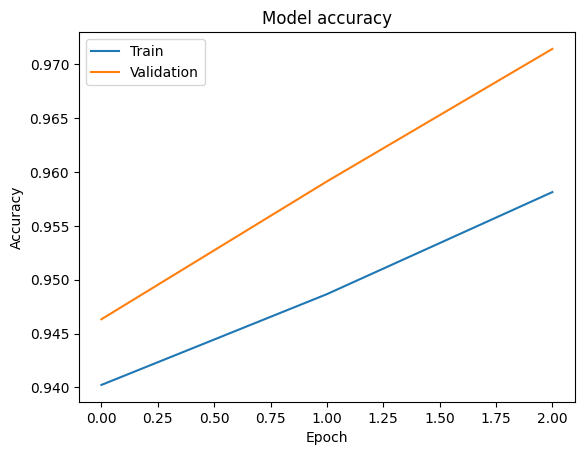

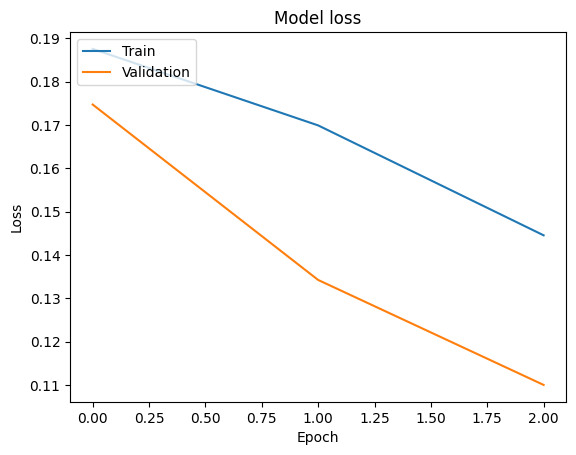

In [50]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [51]:
import numpy as np
test_labels = test_gen_new.classes
predictions = model.predict(test_gen_new)
predicted_classes = np.argmax(predictions, axis=1)

127/127 ━━━━━━━━━━━━━━━━━━━━ 8s 65ms/step


In [52]:
report = classification_report(test_labels, predicted_classes, target_names=list(test_gen_new.class_indices.keys()))
print(report)

              precision    recall  f1-score   support

           0       0.97      0.98      0.97       508
           1       0.99      0.95      0.97       508
           2       0.97      0.97      0.97       508
           3       0.96      0.99      0.98       507

    accuracy                           0.97      2031
   macro avg       0.97      0.97      0.97      2031
weighted avg       0.97      0.97      0.97      2031



In [53]:
conf_matrix = confusion_matrix(test_labels, predicted_classes)

In [54]:
conf_matrix

array([[497,   0,   5,   6],
       [  0, 483,  12,  13],
       [ 15,   1, 491,   1],
       [  2,   2,   0, 503]])

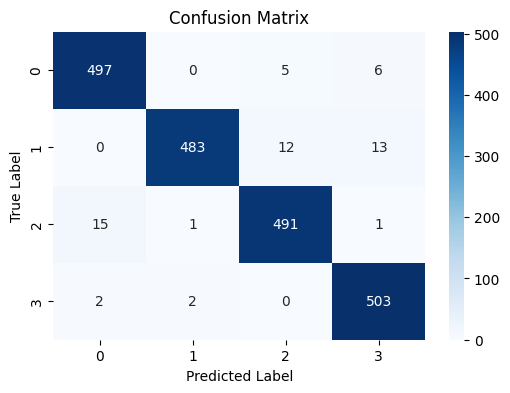

In [55]:
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=list(test_gen_new.class_indices.keys()), yticklabels=list(test_gen_new.class_indices.keys()))
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [56]:
model.save("vit_model1.keras")

In [57]:
from google.colab import files
files.download("vit_model1.keras")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


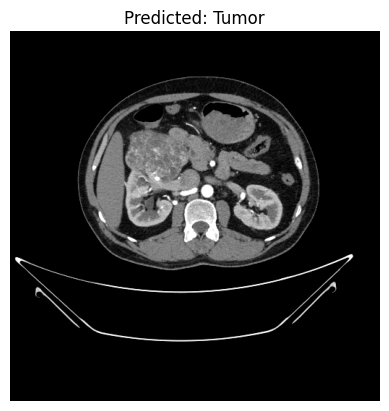

Model Prediction: Tumor


In [58]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image

# Function to preprocess the image
def preprocess_image(img_path, target_size=(224, 224)):
    img = image.load_img(img_path, target_size=target_size)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    img_array /= 255.0  # Normalize pixel values if required
    return img_array

# Function to make a prediction
def predict_image(model, img_path, class_labels):
    img_array = preprocess_image(img_path)
    predictions = model.predict(img_array)
    predicted_class = np.argmax(predictions, axis=1)[0]  # Get class with highest probability

    # Display the image with the predicted class
    img = image.load_img(img_path)
    plt.imshow(img)
    plt.axis("off")
    plt.title(f"Predicted: {class_labels[predicted_class]}")
    plt.show()

    return class_labels[predicted_class]

# Define your class labels based on training data
class_labels = ["Cyst", "Normal", "Stone", "Tumor"]  # Replace with actual class names

# Test with an image
image_path = "/content/sample_data/Tumor- (23).jpg"  # Replace with the actual image path
predicted_class = predict_image(model, image_path, class_labels)
print(f"Model Prediction: {predicted_class}")
